<a href="https://colab.research.google.com/github/GreatLearningAIML1/delhi-may19-batch-Trapti04/blob/master/R8_Lab_Questions_Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy

# metrics related
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
from tensorflow.keras.backend import backend
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


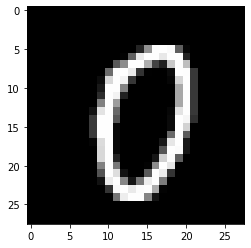

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train_04 = X_train[y_train < 5]

In [0]:
X_train_59 = X_train[y_train >= 5]

In [0]:
y_train_04 =y_train[y_train < 5]
y_train_59 = y_train[y_train >= 5]

In [0]:
X_test_04 = X_test[y_test < 5]

In [0]:
X_test_59 = X_test[y_test >= 5]

In [0]:
y_test_04 =y_test[y_test < 5]
y_test_59 = y_test[y_test >= 5]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [13]:
X_train_04.shape

(30596, 28, 28)

In [14]:
X_train_59.shape

(29404, 28, 28)

In [15]:
y_train_04.shape

(30596,)

In [16]:
y_train_59.shape

(29404,)

In [17]:
X_test_04.shape

(5139, 28, 28)

In [18]:
X_test_59.shape

(4861, 28, 28)

In [19]:
y_test_04.shape

(5139,)

In [20]:
y_test_59.shape

(4861,)

## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_04 = np.asarray(X_train_04).reshape(X_train_04.shape[0],X_train_04.shape[1], X_train_04.shape[2], 1)

In [0]:
X_test_04 = np.asarray(X_test_04).reshape(X_test_04.shape[0],X_test_04.shape[1], X_test_04.shape[2], 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train_04 = X_train_04 / 255.0

In [0]:
X_test_04 = X_test_04/255.0

In [25]:
X_train_04.dtype

dtype('float64')

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [26]:
print(X_train_04.shape)
print(X_train_04.shape[0])
print(X_test_04.shape[0])

(30596, 28, 28, 1)
30596
5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
#ONE HOT VECTOR CONVERSION
y_test_04 = tensorflow.keras.utils.to_categorical(y_test_04, num_classes=5)
y_train_04 = tensorflow.keras.utils.to_categorical(y_train_04, num_classes=5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), padding="same",activation = "relu", input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), padding="same",activation = "relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "softmax"))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
opt = SGD()
# use categorical_crossentropy as there are 5 classes
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [32]:
y_test_04.shape

(5139, 5)

In [33]:
model.fit(X_train_04,y_train_04,          
          validation_data=(X_test_04,y_test_04),
          epochs=15,
          batch_size = 128)

Train on 30596 samples, validate on 5139 samples
Epoch 1/15
30596/30596 [==============================] - 8s 261us/sample - loss: 0.5409 - accuracy: 0.8489 - val_loss: 0.1153 - val_accuracy: 0.9669
Epoch 2/15
30596/30596 [==============================] - 1s 45us/sample - loss: 0.1536 - accuracy: 0.9534 - val_loss: 0.3188 - val_accuracy: 0.8842
Epoch 3/15
30596/30596 [==============================] - 1s 45us/sample - loss: 0.1274 - accuracy: 0.9592 - val_loss: 0.0704 - val_accuracy: 0.9784
Epoch 4/15
30596/30596 [==============================] - 1s 45us/sample - loss: 0.1101 - accuracy: 0.9651 - val_loss: 0.0631 - val_accuracy: 0.9805
Epoch 5/15
30596/30596 [==============================] - 1s 45us/sample - loss: 0.0981 - accuracy: 0.9677 - val_loss: 0.0543 - val_accuracy: 0.9840
Epoch 6/15
30596/30596 [==============================] - 1s 45us/sample - loss: 0.0887 - accuracy: 0.9721 - val_loss: 0.0543 - val_accuracy: 0.9821
Epoch 7/15
30596/30596 [==============================] 

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
y_pred_04 = model.predict(X_test_04)

In [35]:
# Convert predictions classes to one hot vectors 
Y_pred_04 = np.argmax(y_pred_04 ,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_04,axis = 1) 
# compute the confusion matrix

confusion_mtx = confusion_matrix(Y_true, Y_pred_04) 
# plot the confusion matrix
confusion_mtx

array([[ 976,    0,    1,    3,    0],
       [   1, 1130,    4,    0,    0],
       [   6,    3, 1010,    9,    4],
       [   0,    2,    4, 1002,    2],
       [   1,    0,    7,    0,  974]])

In [36]:

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', ]
print(classification_report(Y_true, Y_pred_04, target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99       980
     class 1       1.00      1.00      1.00      1135
     class 2       0.98      0.98      0.98      1032
     class 3       0.99      0.99      0.99      1010
     class 4       0.99      0.99      0.99       982

    accuracy                           0.99      5139
   macro avg       0.99      0.99      0.99      5139
weighted avg       0.99      0.99      0.99      5139



## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [37]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv2d
False
conv2d_1
False
max_pooling2d
False
dropout
False
flatten
False
dense
True
dropout_1
False
dense_1
True


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_test_59 = y_test_59 - 5

In [39]:
y_test_59

array([2, 4, 0, ..., 4, 0, 1], dtype=uint8)

In [0]:
y_train_59 = y_train_59 - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_59 = np.asarray(X_train_59).reshape(X_train_59.shape[0],X_train_59.shape[1], X_train_59.shape[2], 1)

In [0]:
X_test_59 = np.asarray(X_test_59).reshape(X_test_59.shape[0],X_test_59.shape[1], X_test_59.shape[2], 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train_59 = X_train_59 / 255.0
X_test_59 = X_test_59 / 255.0

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [44]:
print(X_train_59.shape)

(29404, 28, 28, 1)


In [45]:
print(X_train_59.shape[0])
print(X_test_59.shape[0])

29404
4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
#ONE HOT VECTOR CONVERSION
y_test_59 = tensorflow.keras.utils.to_categorical(y_test_59, num_classes=5)
y_train_59 = tensorflow.keras.utils.to_categorical(y_train_59, num_classes=5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [47]:
model.fit(X_train_59,y_train_59,          
          validation_data=(X_test_59,y_test_59),
          epochs=10,
          batch_size = 128)

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 1s 46us/sample - loss: 0.4018 - accuracy: 0.8692 - val_loss: 0.1841 - val_accuracy: 0.9430
Epoch 2/10
29404/29404 [==============================] - 1s 46us/sample - loss: 0.2100 - accuracy: 0.9309 - val_loss: 0.1316 - val_accuracy: 0.9582
Epoch 3/10
29404/29404 [==============================] - 1s 46us/sample - loss: 0.1686 - accuracy: 0.9445 - val_loss: 0.1145 - val_accuracy: 0.9652
Epoch 4/10
29404/29404 [==============================] - 1s 45us/sample - loss: 0.1494 - accuracy: 0.9519 - val_loss: 0.1008 - val_accuracy: 0.9679
Epoch 5/10
29404/29404 [==============================] - 1s 45us/sample - loss: 0.1363 - accuracy: 0.9547 - val_loss: 0.0892 - val_accuracy: 0.9714
Epoch 6/10
29404/29404 [==============================] - 1s 45us/sample - loss: 0.1234 - accuracy: 0.9600 - val_loss: 0.0789 - val_accuracy: 0.9733
Epoch 7/10
29404/29404 [==============================] -

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
y_pred_59 = model.predict(X_test_59)

In [49]:
# Convert predictions classes to one hot vectors 
Y_pred_59 = np.argmax(y_pred_59 ,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_59,axis = 1) 
# compute the confusion matrix

new_confusion_mtx = confusion_matrix(Y_true, Y_pred_59) 
# plot the confusion matrix
new_confusion_mtx

array([[ 871,    9,    1,    8,    3],
       [   9,  944,    1,    3,    1],
       [   0,    1, 1006,    5,   16],
       [  12,    9,    5,  944,    4],
       [   8,    2,    7,    9,  983]])

In [50]:
new_target_names = ['class 5', 'class 6', 'class 7', 'class 8', 'class 9', ]
print(classification_report(Y_true, Y_pred_59, target_names= new_target_names))

              precision    recall  f1-score   support

     class 5       0.97      0.98      0.97       892
     class 6       0.98      0.99      0.98       958
     class 7       0.99      0.98      0.98      1028
     class 8       0.97      0.97      0.97       974
     class 9       0.98      0.97      0.98      1009

    accuracy                           0.98      4861
   macro avg       0.98      0.98      0.98      4861
weighted avg       0.98      0.98      0.98      4861



-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [52]:
%ls "/content/drive/My Drive/Documents"

 Churn.csv        'My Kindle Content'/     Recommender_Systems/
 desktop.ini       Project-case_study-2/   Statistical_Learning/
'ML Deployment'/   R6InternalLab/         'Supervised Learning'/
 Model_Tuning/     R8_lab/                'Unsupervised Learning'/


In [0]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [0]:
tweet_df= pd.read_csv("/content/drive/My Drive/Documents/R8_lab/tweets.csv", encoding="latin-1")

In [120]:
tweet_df.shape

(9093, 3)

### Drop null values
- drop all the rows with null values

In [0]:
tweet_df.dropna(axis =0, inplace =True)

In [122]:
tweet_df.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [123]:
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
for x in tweet_df.columns:
    tweet_df[x] = tweet_df[x].map(lambda x: x.lower())
    tweet_df[x] = tweet_df[x].map(lambda x: re.sub('[^a-z0-9#+_\s]', ' ', x)) 
    tweet_df[x] = tweet_df[x].map(lambda x: x.strip())

print dataframe

In [125]:
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [126]:
 tweet_df.loc[tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'negative emotion'].count()

tweet_text                                            519
emotion_in_tweet_is_directed_at                       519
is_there_an_emotion_directed_at_a_brand_or_product    519
dtype: int64

In [127]:
tweet_df.loc[tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'positive emotion'].count()

tweet_text                                            2672
emotion_in_tweet_is_directed_at                       2672
is_there_an_emotion_directed_at_a_brand_or_product    2672
dtype: int64

In [128]:
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweet...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad ip...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cras...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa ma...,google,positive emotion


In [129]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].unique().tolist()

['negative emotion',
 'positive emotion',
 'no emotion toward brand or product',
 'i can t tell']

In [0]:
pp_tweet_df = tweet_df.loc[tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'negative emotion']

In [134]:
pp_tweet_df.shape

(519, 3)

In [0]:
pp_tweet_df = pp_tweet_df.append(tweet_df.loc[tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'positive emotion'])

In [138]:
pp_tweet_df.shape

(3191, 3)

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
pp_tweet_df.is_there_an_emotion_directed_at_a_brand_or_product = pp_tweet_df.is_there_an_emotion_directed_at_a_brand_or_product.map({"positive emotion" : 1,"negative emotion" : 0}).astype(int)

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = pp_tweet_df["tweet_text" ]
y = pp_tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']


In [144]:
print(X.shape)
print(y.shape)

(3191,)
(3191,)


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [150]:
cv = CountVectorizer( min_df=2, stop_words = 'english',ngram_range =(1,2))
train_dtm = cv.fit_transform(X_train)
print(cv.get_feature_names())
test_dtm = cv.transform(X_test)

['000', '03', '10', '10 attendees', '10 hours', '10 iphone', '100', '101', '11', '11ntc', '11ntc sxsw', '12', '12 months', '12b', '12b miles', '13', '13 google', '14', '14 day', '1413', '15', '15 details', '15 hard', '15 iphone', '15 minute', '150', '150 million', '1500', '1500 macbook', '15k', '15k newsapps', '1986', '1st', '1st day', '1st prize', '1st time', '20', '20 min', '200', '2011', '2011 computing', '2011 google', '2011 link', '2011 mention', '2011 novelty', '2011 prizes', '22', '22 tracks', '24', '24 amp', '24 hours', '24 stream', '25', '250k', '2day', '2nd', '2nd place', '2nd prize', '2s', '2s sxsw', '2yrs', '30', '30 line', '30pm', '32', '32gb', '35', '35 million', '37', '3d', '3d buildings', '3d rendering', '3d xml', '3g', '3g 64mb', '3g ipad', '3g iphone', '40', '40 google', '40 users', '4g', '4g austin', '4sq', '4sq sxsw', '4square', '50', '5pm', '5pm sxsw', '5pm tomorrow', '60', '64gb', '64gig', '64gig wifi', '64mb', '64mb apple', '65', '65 link', '6th', '6th amp', '6th

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [153]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(train_dtm, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.87
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Fit the classifer
- fit logistic regression classifier

In [155]:
lr = grid.best_estimator_
lr.fit(train_dtm, y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(train_dtm, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

### Fit the classifer
- fit naive bayes classifier

In [162]:
param_grid_nb = {'alpha': [0.001]}
nb_grid = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5)
nb_grid.fit(train_dtm, y_train)

print("Best cross-validation score: {:.2f}".format(nb_grid.best_score_))
print("Best parameters: ", nb_grid.best_params_)
print("Best estimator: ", nb_grid.best_estimator_)

Best cross-validation score: 0.85
Best parameters:  {'alpha': 0.001}
Best estimator:  MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)


## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [156]:
lr.predict(test_dtm)


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [163]:
nb_lr = nb_grid.best_estimator_
nb_lr.fit(train_dtm, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [157]:
print("Score: {:.2f}".format(lr.score(test_dtm, y_test)))

Score: 0.88


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [164]:
print("Score: {:.2f}".format(nb_lr.score(test_dtm, y_test)))

Score: 0.87
